## Face detection using HOG

In [ ]:
import sys
import dlib
from skimage import io

# Take the image file name from the command line
file_name = "test_images/x.jpg"

# Create a HOG face detector using the built-in dlib class
face_detector = dlib.get_frontal_face_detector()

win = dlib.image_window()

# Load the image into an array
image = io.imread(file_name)

# Run the HOG face detector on the image data.
# The result will be the bounding boxes of the faces in our image.
detected_faces = face_detector(image, 1)

print("I found {} faces in the file {}".format(len(detected_faces), file_name))

# Open a window on the desktop showing the image
win.set_image(image)

# Loop through each face we found in the image
for i, face_rect in enumerate(detected_faces):

	# Detected faces are returned as an object with the coordinates 
	# of the top, left, right and bottom edges
	print("- Face #{} found at Left: {} Top: {} Right: {} Bottom: {}".format(i, face_rect.left(), face_rect.top(), face_rect.right(), face_rect.bottom()))

	# Draw a box around each face we found
	win.add_overlay(face_rect)
	        
# Wait until the user hits <enter> to close the window	        
dlib.hit_enter_to_continue()

## Face landmark detection using HOG

In [2]:
import sys
import dlib
from skimage import io

# You can download the required pre-trained face detection model here:
# http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
predictor_model = "models/Dlib/shape_predictor_68_face_landmarks.dat"

# Take the image file name from the command line
file_name = "test_images/x.jpg"

# Create a HOG face detector using the built-in dlib class
face_detector = dlib.get_frontal_face_detector()
face_pose_predictor = dlib.shape_predictor(predictor_model)

win = dlib.image_window()

# Take the image file name from the command line
file_name = "test_images/x.jpg"

# Load the image
image = io.imread(file_name)

# Run the HOG face detector on the image data
detected_faces = face_detector(image, 1)

print("Found {} faces in the image file {}".format(len(detected_faces), file_name))

# Show the desktop window with the image
win.set_image(image)

# Loop through each face we found in the image
for i, face_rect in enumerate(detected_faces):

	# Detected faces are returned as an object with the coordinates 
	# of the top, left, right and bottom edges
	print("- Face #{} found at Left: {} Top: {} Right: {} Bottom: {}".format(i, face_rect.left(), face_rect.top(), face_rect.right(), face_rect.bottom()))

	# Draw a box around each face we found
	win.add_overlay(face_rect)

	# Get the the face's pose
	pose_landmarks = face_pose_predictor(image, face_rect)

	# Draw the face landmarks on the screen.
	win.add_overlay(pose_landmarks)
	        
dlib.hit_enter_to_continue()

Found 3 faces in the image file test_images/x.jpg
- Face #0 found at Left: 436 Top: 121 Right: 511 Bottom: 196
- Face #1 found at Left: 521 Top: 104 Right: 629 Bottom: 211
- Face #2 found at Left: 847 Top: 246 Right: 909 Bottom: 308


## Face detection using Face Recognition Algorithm

In [3]:
# 检测给定图像中的所有人脸 
import face_recognition 
import cv2
#读取图像并识别人脸
img = face_recognition.load_image_file("test_images/x.jpg") 
face_locations = face_recognition.face_locations (img) 
print (face_locations)
#调用 opencv 函数显示图像
img =cv2.imread("test_images/x.jpg") 
cv2.namedWindow("original_img")
cv2.imshow("original_img",img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
#遍历每个人脸，并进行标注 
faceNum = len(face_locations)
for i in range(0, faceNum):
    top = face_locations[i][0] 
    right = face_locations[i][1] 
    bottom = face_locations[i][2] 
    left = face_locations[i][3] 
    start = (left, top) 
    end = (right, bottom) 
    color = (55,255,155) 
    thickness = 3
    cv2.rectangle(img, start, end, color, thickness)
#显示检测识别结果
cv2.namedWindow("detect_faces") 
cv2.imshow("detect_faces", img) 
cv2.waitKey(0)
cv2.destroyAllWindows()

[(121, 511, 196, 436), (104, 629, 211, 521), (246, 909, 308, 847)]


## Face feature marking using Face Recognition Algorithm

In [4]:
#检测和标记图像中的人脸特征 Step by step
from PIL import Image, ImageDraw 
import face_recognition
#将png 文件加载到numpy数组中
image = face_recognition.load_image_file("test_images/putin_f.jpg")
#查找图像中所有的面部特征
face_landmarks_list = face_recognition.face_landmarks (image)
#打印发现的脸的张数
print("I found {} face(s) in this photograph.".format(len(face_landmarks_list))) 
for face_landmarks in face_landmarks_list:
    #打印此图像中每个面部特征的位置 
    facial_features = [
        'chin',
        'left_eyebrow',
        'right_eyebrow',
        'nose_bridge',
        'nose_tip',
        'left_eye',
        'right_eye',
        'top_lip',
        'bottom_lip'
    ]
    for facial_feature in facial_features: print("The {} in this face has the following points: {}".format(facial_feature,face_landmarks[facial_feature]))
    #在图像中描绘出每个人脸的特征
    pil_image = Image.fromarray(image) 
    d = ImageDraw.Draw(pil_image)
    for facial_feature in facial_features:
        d.line(face_landmarks[facial_feature],width=5)
        pil_image.show()

I found 1 face(s) in this photograph.
The chin in this face has the following points: [(359, 154), (358, 179), (358, 204), (361, 228), (367, 250), (382, 269), (402, 283), (424, 295), (447, 301), (470, 300), (490, 291), (508, 278), (521, 260), (529, 240), (534, 218), (538, 196), (541, 172)]
The left_eyebrow in this face has the following points: [(388, 151), (402, 140), (420, 137), (437, 140), (453, 148)]
The right_eyebrow in this face has the following points: [(474, 153), (489, 147), (505, 146), (520, 152), (529, 164)]
The nose_bridge in this face has the following points: [(463, 165), (462, 183), (462, 201), (461, 219)]
The nose_tip in this face has the following points: [(439, 224), (448, 229), (458, 233), (468, 231), (476, 228)]
The left_eye in this face has the following points: [(408, 162), (419, 158), (429, 159), (438, 167), (428, 168), (417, 166)]
The right_eye in this face has the following points: [(482, 172), (492, 166), (502, 167), (510, 173), (502, 175), (491, 175)]
The to

KeyboardInterrupt: 

In [6]:
#检测和标记图像中的人脸特征 2 faces
from PIL import Image, ImageDraw
import face_recognition

# Load the jpg file into a numpy array
image = face_recognition.load_image_file("test_images/two_people.jpg")

# Find all facial features in all the faces in the image
face_landmarks_list = face_recognition.face_landmarks(image)

print("I found {} face(s) in this photograph.".format(len(face_landmarks_list)))

# Create a PIL imagedraw object so we can draw on the picture
pil_image = Image.fromarray(image)
d = ImageDraw.Draw(pil_image)

for face_landmarks in face_landmarks_list:

    # Print the location of each facial feature in this image
    for facial_feature in face_landmarks.keys():
        print("The {} in this face has the following points: {}".format(facial_feature, face_landmarks[facial_feature]))

    # Let's trace out each facial feature in the image with a line!
    for facial_feature in face_landmarks.keys():
        d.line(face_landmarks[facial_feature], width=5)

# Show the picture
pil_image.show()

I found 2 face(s) in this photograph.
The chin in this face has the following points: [(789, 129), (788, 150), (787, 171), (788, 191), (795, 211), (808, 227), (824, 239), (842, 249), (862, 253), (881, 254), (897, 247), (911, 236), (921, 222), (928, 206), (933, 188), (937, 171), (940, 153)]
The left_eyebrow in this face has the following points: [(821, 110), (831, 102), (845, 101), (860, 104), (872, 111)]
The right_eyebrow in this face has the following points: [(891, 117), (905, 116), (918, 118), (929, 124), (935, 135)]
The nose_bridge in this face has the following points: [(881, 128), (880, 141), (880, 154), (879, 167)]
The nose_tip in this face has the following points: [(857, 174), (865, 178), (874, 181), (881, 181), (888, 180)]
The left_eye in this face has the following points: [(834, 124), (843, 122), (851, 124), (858, 129), (850, 129), (841, 127)]
The right_eye in this face has the following points: [(896, 138), (906, 136), (914, 138), (920, 143), (913, 144), (904, 142)]
The to

## Identifying people and drawing name boxes on faces using Face Recognition Algorithm

In [7]:
import face_recognition
from PIL import Image, ImageDraw
import numpy as np

# This is an example of running face recognition on a single image
# and drawing a box around each person that was identified.

# Load a sample picture and learn how to recognize it.
obama_image = face_recognition.load_image_file("test_images/obama.jpg")
obama_face_encoding = face_recognition.face_encodings(obama_image)[0]

# Load a second sample picture and learn how to recognize it.
biden_image = face_recognition.load_image_file("test_images/biden.jpg")
biden_face_encoding = face_recognition.face_encodings(biden_image)[0]

# Create arrays of known face encodings and their names
known_face_encodings = [
    obama_face_encoding,
    biden_face_encoding
]
known_face_names = [
    "Barack Obama",
    "Joe Biden"
]

# Load an image with an unknown face
unknown_image = face_recognition.load_image_file("test_images/two_people.jpg")

# Find all the faces and face encodings in the unknown image
face_locations = face_recognition.face_locations(unknown_image)
face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

# Convert the image to a PIL-format image so that we can draw on top of it with the Pillow library
# See http://pillow.readthedocs.io/ for more about PIL/Pillow
pil_image = Image.fromarray(unknown_image)
# Create a Pillow ImageDraw Draw instance to draw with
draw = ImageDraw.Draw(pil_image)

# Loop through each face found in the unknown image
for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    # See if the face is a match for the known face(s)
    matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

    name = "Unknown"

    # If a match was found in known_face_encodings, just use the first one.
    # if True in matches:
    #     first_match_index = matches.index(True)
    #     name = known_face_names[first_match_index]

    # Or instead, use the known face with the smallest distance to the new face
    face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
    best_match_index = np.argmin(face_distances)
    if matches[best_match_index]:
        name = known_face_names[best_match_index]

    # Draw a box around the face using the Pillow module
    draw.rectangle(((left, top), (right, bottom)), outline=(0, 0, 255))

    # Draw a label with a name below the face
    text_width, text_height = draw.textsize(name)
    draw.rectangle(((left, bottom - text_height - 10), (right, bottom)), fill=(0, 0, 255), outline=(0, 0, 255))
    draw.text((left + 6, bottom - text_height - 5), name, fill=(255, 255, 255, 255))


# Remove the drawing library from memory as per the Pillow docs
del draw

# Display the resulting image
pil_image.show()

# You can also save a copy of the new image to disk if you want by uncommenting this line
# pil_image.save("image_with_boxes.jpg")

C:\Users\LXW\AppData\Local\Temp\ipykernel_26188\1085207235.py:61: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(name)
C:\Users\LXW\AppData\Local\Temp\ipykernel_26188\1085207235.py:61: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(name)


## Face makup using Face Recognition Algorithm

In [8]:
from PIL import Image, ImageDraw
import face_recognition

# Load the jpg file into a numpy array
image = face_recognition.load_image_file("test_images/biden.jpg")

# Find all facial features in all the faces in the image
face_landmarks_list = face_recognition.face_landmarks(image)

pil_image = Image.fromarray(image)
for face_landmarks in face_landmarks_list:
    d = ImageDraw.Draw(pil_image, 'RGBA')

    # Make the eyebrows into a nightmare
    d.polygon(face_landmarks['left_eyebrow'], fill=(68, 54, 39, 128))
    d.polygon(face_landmarks['right_eyebrow'], fill=(68, 54, 39, 128))
    d.line(face_landmarks['left_eyebrow'], fill=(68, 54, 39, 150), width=5)
    d.line(face_landmarks['right_eyebrow'], fill=(68, 54, 39, 150), width=5)

    # Gloss the lips
    d.polygon(face_landmarks['top_lip'], fill=(150, 0, 0, 128))
    d.polygon(face_landmarks['bottom_lip'], fill=(150, 0, 0, 128))
    d.line(face_landmarks['top_lip'], fill=(150, 0, 0, 64), width=8)
    d.line(face_landmarks['bottom_lip'], fill=(150, 0, 0, 64), width=8)

    # Sparkle the eyes
    d.polygon(face_landmarks['left_eye'], fill=(255, 255, 255, 30))
    d.polygon(face_landmarks['right_eye'], fill=(255, 255, 255, 30))

    # Apply some eyeliner
    d.line(face_landmarks['left_eye'] + [face_landmarks['left_eye'][0]], fill=(0, 0, 0, 110), width=6)
    d.line(face_landmarks['right_eye'] + [face_landmarks['right_eye'][0]], fill=(0, 0, 0, 110), width=6)

    pil_image.show()

## Face matching using Face Recognition Algorithm

In [9]:
#识别图像中的人脸 
#导入所需要的库 
import os
import face_recognition
#制作所有可用图像的列表
images = os.listdir('Datasets/MUCT_face_dataset/data/jpg-b/')
#加载图像
image_to_be_matched = face_recognition.load_image_file('Datasets/MUCT_face_dataset/data/jpg-a/i000qa-fn.jpg')
#将加载图像编码为特征向量
image_to_be_matched_encoded = face_recognition.face_encodings( image_to_be_matched)[0]
#遍历每张图像
for image in images:
    #加载图像
    current_image = face_recognition.load_image_file("Datasets/MUCT_face_dataset/data/jpg-b/" + image)
    #将加载图像编码为特征向量 
    current_image_encoded = face_recognition.face_encodings(current_image)[0]
    #将你的图像和图像对比，判断是否为同一人
    result = face_recognition.compare_faces([image_to_be_matched_encoded],current_image_encoded)
    #检查图像是否一致
    if result[0] == True:
        print ("Matched:" + image) 
    else:
        print ("Not matched:" + image)

Matched:i000qb-fn.jpg
Matched:i000rb-fn.jpg
Matched:i000sb-fn.jpg
Not matched:i001qb-mn.jpg
Not matched:i001rb-mn.jpg
Not matched:i001sb-mn.jpg
Not matched:i002qb-mn.jpg
Not matched:i002rb-mn.jpg
Not matched:i002sb-mn.jpg
Not matched:i003qb-fn.jpg
Not matched:i003rb-fn.jpg
Not matched:i003sb-fn.jpg
Not matched:i004qb-mn.jpg
Not matched:i004rb-mn.jpg
Not matched:i004sb-mn.jpg
Not matched:i005qb-fn.jpg
Not matched:i005rb-fn.jpg
Not matched:i005sb-fn.jpg
Not matched:i006qb-mn.jpg
Not matched:i006rb-mn.jpg
Not matched:i006sb-mn.jpg


KeyboardInterrupt: 

## Face distance calculation using Face Recognition Algorithm

In [10]:
import face_recognition

# Often instead of just checking if two faces match or not (True or False), it's helpful to see how similar they are.
# You can do that by using the face_distance function.

# The model was trained in a way that faces with a distance of 0.6 or less should be a match. But if you want to
# be more strict, you can look for a smaller face distance. For example, using a 0.55 cutoff would reduce false
# positive matches at the risk of more false negatives.

# Note: This isn't exactly the same as a "percent match". The scale isn't linear. But you can assume that images with a
# smaller distance are more similar to each other than ones with a larger distance.

# Load some images to compare against
known_obama_image = face_recognition.load_image_file("test_images/obama.jpg")
known_biden_image = face_recognition.load_image_file("test_images/biden.jpg")

# Get the face encodings for the known images
obama_face_encoding = face_recognition.face_encodings(known_obama_image)[0]
biden_face_encoding = face_recognition.face_encodings(known_biden_image)[0]

known_encodings = [
    obama_face_encoding,
    biden_face_encoding
]

# Load a test image and get encondings for it
image_to_test = face_recognition.load_image_file("test_images/obama2.jpg")
image_to_test_encoding = face_recognition.face_encodings(image_to_test)[0]

# See how far apart the test image is from the known faces
face_distances = face_recognition.face_distance(known_encodings, image_to_test_encoding)

for i, face_distance in enumerate(face_distances):
    print("The test image has a distance of {:.2} from known image #{}".format(face_distance, i))
    print("- With a normal cutoff of 0.6, would the test image match the known image? {}".format(face_distance < 0.6))
    print("- With a very strict cutoff of 0.5, would the test image match the known image? {}".format(face_distance < 0.5))
    print()

The test image has a distance of 0.35 from known image #0
- With a normal cutoff of 0.6, would the test image match the known image? True
- With a very strict cutoff of 0.5, would the test image match the known image? True

The test image has a distance of 0.82 from known image #1
- With a normal cutoff of 0.6, would the test image match the known image? False
- With a very strict cutoff of 0.5, would the test image match the known image? False


## Face distance calculation using DeepFace Algorithm

In [11]:
# Download model from: https://github.com/serengil/deepface_models/releases
from deepface import DeepFace
import cv2
import matplotlib.pyplot as plt
import pandas as pd

img1_path = "Datasets/Labeled_Faces_in_the_Wild_dataset/Aaron_Peirsol/Aaron_Peirsol_0001.jpg"
img2_path = "Datasets/Labeled_Faces_in_the_Wild_dataset/Aaron_Peirsol/Aaron_Peirsol_0002.jpg"
img3_path = "Datasets/Labeled_Faces_in_the_Wild_dataset/Aaron_Eckhart/Aaron_Eckhart_0001.jpg"

result1 = DeepFace.verify(img1_path=img1_path,img2_path=img2_path)
result2 = DeepFace.verify(img1_path=img1_path,img2_path=img3_path)
result1 #,result2

{'verified': True,
 'distance': 0.3348386559986929,
 'threshold': 0.68,
 'model': 'VGG-Face',
 'detector_backend': 'opencv',
 'similarity_metric': 'cosine',
 'facial_areas': {'img1': {'x': 69,
   'y': 68,
   'w': 114,
   'h': 114,
   'left_eye': (144, 112),
   'right_eye': (108, 113)},
  'img2': {'x': 69,
   'y': 68,
   'w': 115,
   'h': 115,
   'left_eye': (145, 115),
   'right_eye': (105, 113)}},
 'time': 1.26}

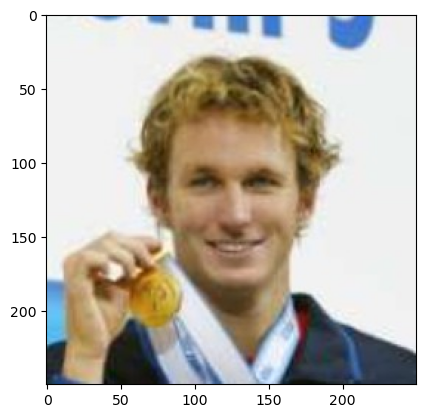

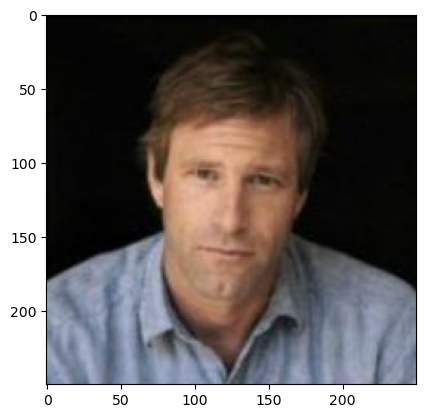

result: {'verified': False, 'distance': 0.8705372333943301, 'threshold': 0.68, 'model': 'VGG-Face', 'detector_backend': 'opencv', 'similarity_metric': 'cosine', 'facial_areas': {'img1': {'x': 69, 'y': 68, 'w': 114, 'h': 114, 'left_eye': (144, 112), 'right_eye': (108, 113)}, 'img2': {'x': 70, 'y': 67, 'w': 112, 'h': 112, 'left_eye': (147, 112), 'right_eye': (106, 107)}}, 'time': 0.23}
then are not same


In [12]:
from deepface import DeepFace
import cv2
import matplotlib.pyplot as plt
import pandas as pd

def verify(img1_path,img2_path):
    img1 = cv2.imread(img1_path)
    img2 = cv2.imread(img2_path)
    
    plt.imshow(img1[:,:,::-1])
    plt.show()
    plt.imshow(img2[:,:,::-1])
    plt.show()
    
    result = DeepFace.verify(img1_path,img2_path)
    print("result:",result)
    
    verification = result['verified']
    
    if verification:
        print("they are same")
    else:
        print("then are not same")
    
img1_path = "Datasets/Labeled_Faces_in_the_Wild_dataset/Aaron_Peirsol/Aaron_Peirsol_0001.jpg"
img2_path = "Datasets/Labeled_Faces_in_the_Wild_dataset/Aaron_Peirsol/Aaron_Peirsol_0002.jpg"
img3_path = "Datasets/Labeled_Faces_in_the_Wild_dataset/Aaron_Eckhart/Aaron_Eckhart_0001.jpg"

verify(img1_path,img3_path)

## Finding a target face from a dataset using DeepFace Algorithm

In [13]:
# 同一个人
df = DeepFace.find(img_path="Datasets/Labeled_Faces_in_the_Wild_dataset/Aaron_Peirsol/Aaron_Peirsol_0001.jpg", 
              db_path="Datasets/Labeled_Faces_in_the_Wild_dataset/Aaron_Peirsol/")
df

24-05-11 14:09:52 - Searching Datasets/Labeled_Faces_in_the_Wild_dataset/Aaron_Peirsol/Aaron_Peirsol_0001.jpg in 4 length datastore
24-05-11 14:09:52 - find function duration 0.1362764835357666 seconds


[                                            identity  \
 0  Datasets/Labeled_Faces_in_the_Wild_dataset/Aar...   
 1  Datasets/Labeled_Faces_in_the_Wild_dataset/Aar...   
 2  Datasets/Labeled_Faces_in_the_Wild_dataset/Aar...   
 3  Datasets/Labeled_Faces_in_the_Wild_dataset/Aar...   
 
                                        hash  target_x  target_y  target_w  \
 0  e87f88f9ba3c47c5dd6fc0668698865f2f2b1a97        69        68       114   
 1  84e0ccb3677d1dbb099796907315d79b830763a3        71        70       109   
 2  0367f531ca1df98ca6efcab1f5398a9d8109a391        69        68       115   
 3  36f5af5c440691f0b57ac6b91cd6b18a77993283        71        68       111   
 
    target_h  source_x  source_y  source_w  source_h  threshold  distance  
 0       114        69        68       114       114       0.68  0.000000  
 1       109        69        68       114       114       0.68  0.311855  
 2       115        69        68       114       114       0.68  0.334839  
 3       111     

In [14]:
# 不同人
df = DeepFace.find(img_path="Datasets/Labeled_Faces_in_the_Wild_dataset/Aaron_Peirsol/Aaron_Peirsol_0001.jpg", 
              db_path="Datasets/Labeled_Faces_in_the_Wild_dataset/Abdoulaye_Wade/")
df

24-05-11 14:09:57 - Searching Datasets/Labeled_Faces_in_the_Wild_dataset/Aaron_Peirsol/Aaron_Peirsol_0001.jpg in 4 length datastore
24-05-11 14:09:57 - find function duration 0.13613128662109375 seconds


[Empty DataFrame
 Columns: [identity, hash, target_x, target_y, target_w, target_h, source_x, source_y, source_w, source_h, threshold, distance]
 Index: []]

## Analysing face artributes using DeepFace Algorithm

In [15]:
obj = DeepFace.analyze(img_path = img1_path)
obj

Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:09<00:00,  2.28s/it]


[{'emotion': {'angry': 9.81738371153007e-09,
   'disgust': 2.181478637325058e-12,
   'fear': 1.3071457249935747e-07,
   'happy': 99.60630536079407,
   'sad': 9.577201609545227e-06,
   'surprise': 2.2353451356593723e-05,
   'neutral': 0.3936594817787409},
  'dominant_emotion': 'happy',
  'region': {'x': 69,
   'y': 68,
   'w': 114,
   'h': 114,
   'left_eye': (144, 112),
   'right_eye': (108, 113)},
  'face_confidence': 0.9,
  'age': 24,
  'gender': {'Woman': 0.00162050509970868, 'Man': 99.99837875366211},
  'dominant_gender': 'Man',
  'race': {'asian': 1.3599935590126629e-13,
   'indian': 6.580966897155123e-14,
   'black': 2.3297782675038974e-18,
   'white': 100.0,
   'middle eastern': 4.202927073038154e-06,
   'latino hispanic': 3.0297717668048563e-07},
  'dominant_race': 'white'}]